In [1]:
from matplotlib import pyplot as plt

%matplotlib ipympl

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 7.5
# 用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['figure.autolayout'] = True
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [2]:
import numpy as np
import pandas as pd
import pylatex
pd.options.display.float_format = '{:.2e}'.format

from calculate_increases import calculate_increases
from line_chart_with_multiple_lines import line_chart_with_multiple_lines
from grouped_bar_chart import grouped_bar_chart
from parse_data import *

In [3]:
benchmark_max_stack_usages = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('benchmark_max_stack_usages', 'stack_size'),
    'max_stack_usage',
    True
)

benchmark_instruction_counts = parse_profile_data_in_directory_to_dataframe(
    parse_benchmark_instruction_counts_directory('benchmark_instruction_counts'),
    'instruction_count',
    True
)

benchmark_writes_on_hottest_stack_addresses = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('benchmark_writes_on_hottest_stack_addresses', 'writes'),
    'writes_on_hottest_stack_address',
    True
)

max_number_of_stack_frames_on_a_stack_address = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('max_number_of_stack_frames_on_a_stack_address', 'number_of_stack_frames'),
    'max_number_of_stack_frames_on_a_stack_address',
    True
)

writes_on_hottest_address_in_stack_frames = parse_profile_data_in_directory_to_dataframe(
    parse_json_format_profile_data_directory('writes_on_hottest_address_in_stack_frames', 'writes'),
    'writes_on_hottest_address_in_stack_frames',
    True
)

In [4]:
import re

In [5]:
def f(types_of_benchmarks):
    recursion_depth_limit_benchmark_type_pattern = re.compile(r'new_loop2recursion-recursion_depth_limit-(\d+)')
    for benchmark_type in types_of_benchmarks:
        match = recursion_depth_limit_benchmark_type_pattern.match(benchmark_type)
        if match:
            recursion_depth_limit_string, *_ = match.groups()
            recursion_depth_limit = int(recursion_depth_limit_string)
            yield recursion_depth_limit

recursion_depth_limit_list = list(f(benchmark_max_stack_usages['executable_type'].unique()))
recursion_depth_limit_list.sort()
recursion_depth_limit_list

[8, 16, 32, 64]

In [6]:
def g(types_of_benchmarks):
    loop_iterations_benchmark_type_pattern = re.compile(r'new_loop2recursion-loop_iterations-(\d+)')
    for benchmark_type in types_of_benchmarks:
        match = loop_iterations_benchmark_type_pattern.match(benchmark_type)
        if match:
            loop_iterations_string, *_ = match.groups()
            loop_iterations = int(loop_iterations_string)
            yield loop_iterations

loop_iterations_list = list(g(benchmark_max_stack_usages['executable_type'].unique()))
loop_iterations_list.sort()
loop_iterations_list

[8, 16, 32, 64]

In [7]:
recursion_depth_limit_executable_type_renaming = {
    f'new_loop2recursion-recursion_depth_limit-{recursion_depth_limit}': f'{recursion_depth_limit:02}'
    for recursion_depth_limit in recursion_depth_limit_list
}

recursion_depth_limit_executable_type_renaming['new_loop2recursion'] = 'Unlimited'

recursion_depth_limit_executable_type_renaming

{'new_loop2recursion-recursion_depth_limit-8': '08',
 'new_loop2recursion-recursion_depth_limit-16': '16',
 'new_loop2recursion-recursion_depth_limit-32': '32',
 'new_loop2recursion-recursion_depth_limit-64': '64',
 'new_loop2recursion': 'Unlimited'}

In [8]:
loop_iterations_executable_type_renaming = { 'new_loop2recursion': f'{0:02}' }

for loop_iterations in loop_iterations_list:
    loop_iterations_executable_type_renaming[f'new_loop2recursion-loop_iterations-{loop_iterations}'] = f'{loop_iterations:02}'

loop_iterations_executable_type_renaming

{'new_loop2recursion': '00',
 'new_loop2recursion-loop_iterations-8': '08',
 'new_loop2recursion-loop_iterations-16': '16',
 'new_loop2recursion-loop_iterations-32': '32',
 'new_loop2recursion-loop_iterations-64': '64'}

In [9]:
recursion_depth_limit_benchmark_max_stack_usages = benchmark_max_stack_usages[
    benchmark_max_stack_usages['executable_type'].isin(
        recursion_depth_limit_executable_type_renaming
    )
].replace(
    to_replace=recursion_depth_limit_executable_type_renaming
).sort_values(
    by=['benchmark', 'executable_type']
)

recursion_depth_limit_benchmark_max_stack_usages

,executable_type,benchmark,max_stack_usage
225,08,average,6.25e+05
227,16,average,6.25e+05
234,32,average,6.27e+05
223,64,average,6.30e+05
236,Unlimited,average,4.49e+06
...,...,...,...
58,08,susan,3.72e+05
84,16,susan,3.72e+05
175,32,susan,3.74e+05
32,64,susan,3.83e+05


In [10]:
average_recursion_depth_limit_benchmark_max_stack_usages = recursion_depth_limit_benchmark_max_stack_usages[
    recursion_depth_limit_benchmark_max_stack_usages['benchmark'] == 'average'
]['max_stack_usage'].values[:-1]
average_recursion_depth_limit_benchmark_max_stack_usages

array([624776.61538462, 625425.23076923, 626862.76923077, 629828.92307692])

In [11]:
recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = benchmark_writes_on_hottest_stack_addresses[
    benchmark_writes_on_hottest_stack_addresses['executable_type'].isin(
        recursion_depth_limit_executable_type_renaming
    )
].replace(
    to_replace=recursion_depth_limit_executable_type_renaming
).sort_values(
    by=['benchmark', 'executable_type']
)

recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses

,executable_type,benchmark,writes_on_hottest_stack_address
225,08,average,2.53e+05
227,16,average,1.89e+05
234,32,average,1.62e+05
223,64,average,1.46e+05
236,Unlimited,average,1.29e+05
...,...,...,...
58,08,susan,1.40e+05
84,16,susan,6.86e+04
175,32,susan,3.72e+04
32,64,susan,1.79e+04


In [12]:
average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses[
    recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses['benchmark'] == 'average'
]['writes_on_hottest_stack_address'].values[:-1]
average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses

array([253315.07692308, 189150.84615385, 161817.38461538, 145674.30769231])

In [13]:
loop_iterations_benchmark_max_stack_usages = benchmark_max_stack_usages[
    benchmark_max_stack_usages['executable_type'].isin(
        loop_iterations_executable_type_renaming
    )
].replace(
    to_replace=loop_iterations_executable_type_renaming
).sort_values(
    by=['benchmark', 'executable_type']
)

loop_iterations_benchmark_max_stack_usages

,executable_type,benchmark,max_stack_usage
236,00,average,4.49e+06
231,08,average,1.82e+06
230,16,average,1.22e+06
235,32,average,9.21e+05
226,64,average,7.73e+05
...,...,...,...
201,00,susan,3.81e+05
136,08,susan,3.72e+05
123,16,susan,3.72e+05
188,32,susan,3.72e+05


In [14]:
average_loop_iterations_benchmark_max_stack_usages = loop_iterations_benchmark_max_stack_usages[
    loop_iterations_benchmark_max_stack_usages['benchmark'] == 'average'
]['max_stack_usage'].values[1:]
average_loop_iterations_benchmark_max_stack_usages

array([1819961.84615385, 1220800.        ,  921387.07692308,
        772502.15384615])

In [15]:
loop_iterations_benchmark_writes_on_hottest_stack_addresses = benchmark_writes_on_hottest_stack_addresses[
    benchmark_writes_on_hottest_stack_addresses['executable_type'].isin(
        loop_iterations_executable_type_renaming
    )
].replace(
    to_replace=loop_iterations_executable_type_renaming
).sort_values(
    by=['benchmark', 'executable_type']
)

loop_iterations_benchmark_writes_on_hottest_stack_addresses

,executable_type,benchmark,writes_on_hottest_stack_address
236,00,average,1.29e+05
231,08,average,1.64e+05
230,16,average,2.16e+05
235,32,average,3.06e+05
226,64,average,4.51e+05
...,...,...,...
201,00,susan,1.78e+04
136,08,susan,2.17e+05
123,16,susan,4.83e+05
188,32,susan,9.84e+05


In [16]:
average_loop_iterations_benchmark_writes_on_hottest_stack_addresses = loop_iterations_benchmark_writes_on_hottest_stack_addresses[
    loop_iterations_benchmark_writes_on_hottest_stack_addresses['benchmark'] == 'average'
]['writes_on_hottest_stack_address'].values[1:]
average_loop_iterations_benchmark_writes_on_hottest_stack_addresses

array([164266.61538462, 216038.        , 306051.07692308, 450901.07692308])

In [17]:
average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_recursion_depth_limits = pd.DataFrame({
    'Recursion Depth Limit': list(recursion_depth_limit_executable_type_renaming.values())[:-1],
    'Average Maximum Stack Usages': average_recursion_depth_limit_benchmark_max_stack_usages,
    'Average Writes on Hottest Stack Address': average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses
}).to_latex(
    caption='Average Maximum Stack Usages and Average Writes on Hottest Stack Address Under Different Recursion Depth Limits',
    label='table:average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_recursion_depth_limits',
    index=False
)

print(average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_recursion_depth_limits)

\begin{table}
\centering
\caption{Average Maximum Stack Usages and Average Writes on Hottest Stack Address Under Different Recursion Depth Limits}
\label{table:average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_recursion_depth_limits}
\begin{tabular}{lrr}
\toprule
Recursion Depth Limit &  Average Maximum Stack Usages &  Average Writes on Hottest Stack Address \\
\midrule
                   08 &                      6.25e+05 &                                 2.53e+05 \\
                   16 &                      6.25e+05 &                                 1.89e+05 \\
                   32 &                      6.27e+05 &                                 1.62e+05 \\
                   64 &                      6.30e+05 &                                 1.46e+05 \\
\bottomrule
\end{tabular}
\end{table}



In [18]:
average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_loop_iterations = pd.DataFrame({
    'Loop Iterations': list(loop_iterations_executable_type_renaming.values())[1:],
    'Average Maximum Stack Usages': average_loop_iterations_benchmark_max_stack_usages,
    'Average Writes on Hottest Stack Address': average_loop_iterations_benchmark_writes_on_hottest_stack_addresses
}).to_latex(
    caption='Average Maximum Stack Usages and Average Writes on Hottest Stack Address Under Different Loop Iterations',
    label='table:average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_loop_iterations',
    index=False
)

print(average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_loop_iterations)

\begin{table}
\centering
\caption{Average Maximum Stack Usages and Average Writes on Hottest Stack Address Under Different Loop Iterations}
\label{table:average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_loop_iterations}
\begin{tabular}{lrr}
\toprule
Loop Iterations &  Average Maximum Stack Usages &  Average Writes on Hottest Stack Address \\
\midrule
             08 &                      1.82e+06 &                                 1.64e+05 \\
             16 &                      1.22e+06 &                                 2.16e+05 \\
             32 &                      9.21e+05 &                                 3.06e+05 \\
             64 &                      7.73e+05 &                                 4.51e+05 \\
\bottomrule
\end{tabular}
\end{table}



In [19]:
import itertools

In [20]:
import statistics

In [21]:
average_benchmark_writes_on_hottest_stack_addresses_mean = statistics.mean(
    itertools.chain(
        average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
        average_loop_iterations_benchmark_writes_on_hottest_stack_addresses
    )
)

average_benchmark_writes_on_hottest_stack_addresses_stdev = statistics.stdev(
    itertools.chain(
        average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
        average_loop_iterations_benchmark_writes_on_hottest_stack_addresses
    )
)

In [22]:
average_benchmark_max_stack_usages_mean = statistics.mean(
    itertools.chain(
        average_recursion_depth_limit_benchmark_max_stack_usages,
        average_loop_iterations_benchmark_max_stack_usages
    )
)

average_benchmark_max_stack_usages_stdev = statistics.stdev(
    itertools.chain(
        average_recursion_depth_limit_benchmark_max_stack_usages,
        average_loop_iterations_benchmark_max_stack_usages
    )
)

In [23]:
normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses = (
    average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses - average_benchmark_writes_on_hottest_stack_addresses_mean
) / average_benchmark_writes_on_hottest_stack_addresses_stdev

In [24]:
normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses

array([ 0.17076279, -0.4584618 , -0.72650657, -0.88481316])

In [25]:
normalized_average_loop_iterations_benchmark_writes_on_hottest_stack_addresses = (
    average_loop_iterations_benchmark_writes_on_hottest_stack_addresses - average_benchmark_writes_on_hottest_stack_addresses_mean
) / average_benchmark_writes_on_hottest_stack_addresses_stdev

In [26]:
normalized_average_loop_iterations_benchmark_writes_on_hottest_stack_addresses

array([-0.70248826, -0.19479374,  0.68791679,  2.10838394])

In [27]:
normalized_average_recursion_depth_limit_benchmark_max_stack_usages = (
    average_recursion_depth_limit_benchmark_max_stack_usages - average_benchmark_max_stack_usages_mean
) / average_benchmark_max_stack_usages_stdev

In [28]:
normalized_average_recursion_depth_limit_benchmark_max_stack_usages

array([-0.65977725, -0.65825116, -0.65486885, -0.64788994])

In [29]:
normalized_average_loop_iterations_benchmark_max_stack_usages = (
    average_loop_iterations_benchmark_max_stack_usages - average_benchmark_max_stack_usages_mean
) / average_benchmark_max_stack_usages_stdev

In [30]:
normalized_average_loop_iterations_benchmark_max_stack_usages

array([ 2.15231167,  0.74257505,  0.03810202, -0.31220154])

In [31]:
from regression import regression

In [32]:
def f(x, a, b):
    return -a * x + b

In [33]:
def g(x, a, b, c):
    return a * np.exp(-b * x) + c

In [34]:
normalized_average_recursion_depth_limit_parameter_values, normalized_average_recursion_depth_limit_r_squared = regression(
    f,
    normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_recursion_depth_limit_benchmark_max_stack_usages,
)
normalized_average_recursion_depth_limit_r_squared
normalized_average_recursion_depth_limit_f = '-%.4f * x + %.4f, r^2 = %.4f' % (*normalized_average_recursion_depth_limit_parameter_values, normalized_average_recursion_depth_limit_r_squared)
normalized_average_recursion_depth_limit_f

'-0.0094 * x + -0.6597, r^2 = 0.6814'

In [35]:
normalized_average_loop_iterations_parameter_values, normalized_average_loop_iterations_r_squared = regression(
    g,
    normalized_average_loop_iterations_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_loop_iterations_benchmark_max_stack_usages,
)

normalized_average_loop_iterations_g = '%.4f * exp(-%.4f * x) + %.4f, r^2 = %.4f' % (*normalized_average_loop_iterations_parameter_values, normalized_average_loop_iterations_r_squared)
normalized_average_loop_iterations_g

'0.7934 * exp(-1.5986 * x) + -0.2983, r^2 = 0.9975'

In [36]:
x_start = min(
    min(normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses),
    min(normalized_average_loop_iterations_benchmark_writes_on_hottest_stack_addresses)
)

x_stop = max(
    max(normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses),
    max(normalized_average_loop_iterations_benchmark_writes_on_hottest_stack_addresses)
)

x = np.arange(x_start, x_stop, (x_stop - x_start) / 20)

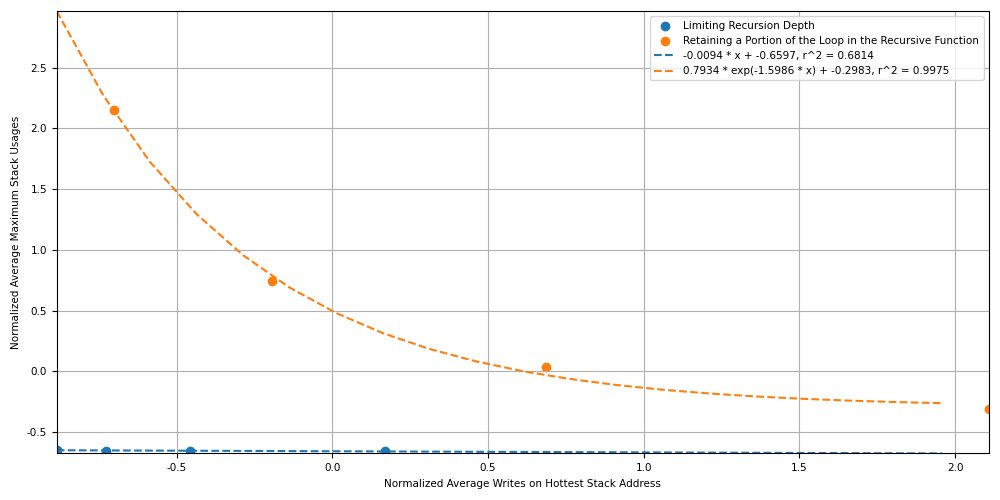

In [37]:
average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_recursion_depth_limits_and_loop_iterations, ax = plt.subplots()

ax.scatter(
    normalized_average_recursion_depth_limit_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_recursion_depth_limit_benchmark_max_stack_usages,
    label='Limiting Recursion Depth'
)

ax.scatter(
    normalized_average_loop_iterations_benchmark_writes_on_hottest_stack_addresses,
    normalized_average_loop_iterations_benchmark_max_stack_usages,
    label='Retaining a Portion of the Loop in the Recursive Function'
)

ax.plot(x, f(x, *normalized_average_recursion_depth_limit_parameter_values), linestyle='dashed', label=normalized_average_recursion_depth_limit_f)
ax.plot(x, g(x, *normalized_average_loop_iterations_parameter_values), linestyle='dashed', label=normalized_average_loop_iterations_g)

ax.set_xlabel('Normalized Average Writes on Hottest Stack Address')
ax.set_ylabel('Normalized Average Maximum Stack Usages')

ax.legend()
ax.grid(True)

In [38]:
average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_recursion_depth_limits_and_loop_iterations.savefig(
    'average_maximum_stack_usages_and_average_writes_on_hottest_stack_address_under_different_recursion_depth_limits_and_loop_iterations.pdf'
)